# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [2]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[:500])

<class 'str'>
120253
﻿

***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************



*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE
IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK
(#1533) at https://www.gutenberg.org/ebooks/1533
*********************************


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

In [3]:
#THIS CELL GRABS THE SCRIPT ONLY
macb_script = macbeth[macbeth.index("David Reed")+len("David Reed"):macbeth.index("FINIS")+len("FINIS. THE TRAGEDIE OF MACBETH.")] #save just the script from macbeth
#print(macb_script) #uncomment this to see the entire script

{'the': 647, 'and': 545, 'to': 383, 'of': 338, 'i': 331, 'a': 239, 'that': 227, 'my': 203, 'you': 203, 'in': 199, 'is': 180, 'not': 165, 'it': 161, 'with': 153, 'his': 146, 'macb': 137, 'be': 137, 'your': 126, 'our': 123, 'haue': 122, 'but': 120, 'me': 113, 'he': 110, 'for': 109, 'what': 106, 'this': 104, 'so': 96, 'all': 96, 'him': 90, 'as': 89, 'thou': 87, 'we': 83, 'enter': 81, 'which': 80, 'are': 73, 'will': 72, 'they': 70, 'shall': 68, 'no': 67, 'then': 63, 'their': 62, 'macbeth': 62, 'thee': 61, 'macd': 58, 'on': 58, 'vpon': 58, 'from': 57, 'yet': 57, 'thy': 56, 'vs': 55, 'come': 54, 'now': 53, 'at': 52, 'king': 52, 'hath': 52, 'more': 50, 'them': 50, 'rosse': 49, 'good': 48, 'by': 48, 'lady': 48, 'would': 47, 'time': 46, 'was': 45, 'do': 44, 'her': 43, 'who': 43, 'if': 42, 'should': 41, 'did': 41, 'like': 40, 'when': 40, 'there': 39, 'say': 39, 'were': 39, 'make': 38, 'doe': 38, 'lord': 38, 'or': 37, 'tis': 37, 'where': 36, 'must': 36, 'ile': 35, 'let': 35, 'done': 35, 'feare': 

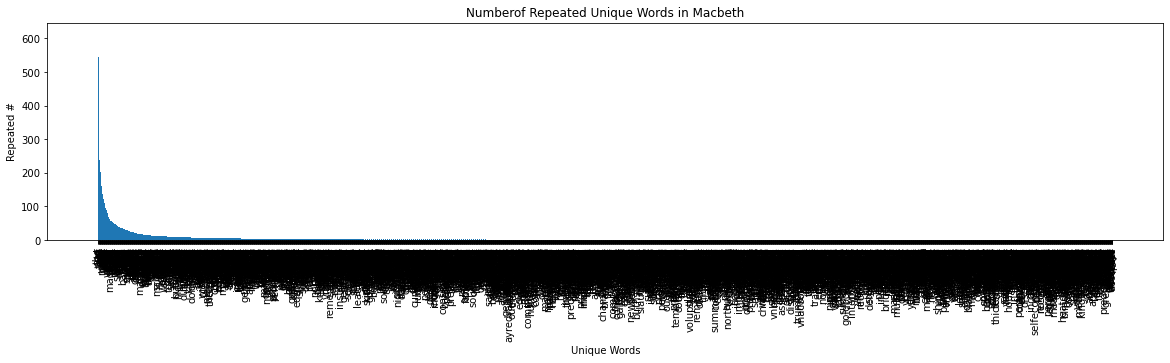

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here

# Pseudo-code outline
# 1. parse the transcript to the macbeth script only (USE macb_script above)
# 2. script.split() to get a list of words split by empty space
# 3. check for special characters
# 4. Create list of unique words
# 5. Create a dictionary in key: uniqueword, value: 0
# 6. Run for loop through list of words and check against unique words and += value if match
# 7. Reverse sort for descending order 
# 8. Plot

#------------------------------------INITILIZE-----------------------------------#
clean_list_macb = [] #initialize blank list to store "clean" words
list_macb = macb_script.split() #list of words in macbeth is macbeth script split at blank spaces

#-------------------------------CLEAN DATA---------------------------------------#
for word in list_macb: #for a word in list_macb
    word = [charac for charac in word if charac.isalpha()] #create list of charater in word that is only in alphabet
    word = "".join(word).lower() #join the character in lower case
    if word != "": #if the word is not blank (due to words like "1.") 
        clean_list_macb.append(word) #append the wordto a clean list

#WARNING: above method may create a false count where Davids == David's
        
#print(clean_list_macb) #sanity check

#------------------INITIALIZATION THAT DEPENDS ON CLEAN DATA---------------------#
unique_macb = list(set(clean_list_macb)) #list of unique words
zerolist = [0] * len(unique_macb) #initialize a list of zeroes that matches the length of unique words
macb_words = dict(zip(unique_macb,zerolist)) #zip two lists above and create dictionary


#print(macb_words) #sanity check, should return dictionary of key: unique words, value: 0

#------------------COUNT UNIQUE WORDS--------------------------------------------#
for word in clean_list_macb: #for word in clean word list
    if word in unique_macb: #if that word is in unique word
        macb_words[word] += 1 #increase the dictionary value by 1
        
#-------------------------SORT DESC-----------------------------------#
#ref: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
macb_words = {k:v for k, v in sorted(macb_words.items(), key=lambda item: item[1], reverse = True)} 
#rewrite macb_words dict by sorting the items with key value (item[1]) in reverse format

print(macb_words) #sanity check, should return descending order sorted macb_words


#-------------------------PLOT-------------------------------------#
sorted_unique_word = macb_words.keys() # get keys for unique words
sorted_word_count = macb_words.values() #get values for bar height

plt.figure(figsize=(20,4)) #this can probably be WAYYYY bigger
plt.bar(sorted_unique_word, sorted_word_count) #set bar graph
plt.ylabel("Repeated #") #set y label
plt.ylim(0,max(sorted_word_count)) #set ylimit to the max word count
plt.xlabel("Unique Words") #set x label
plt.xticks(rotation = "vertical") #set x tick marks (dict keys) in vertical orientation
plt.title("Numberof Repeated Unique Words in Macbeth") #set plot title
plt.show() #show plot

# BELOW IS PSEUDO-CODE-PROVIDED BY THE LESSON
# Split the transcript into words
# Create a dictionary
# Iterate through the text of Macbeth
# Update word counts
# Sort words by counts in descending order
# Create Bar Graph
# Include descriptive titles and labels

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!